# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The data doesn't seem to be normally distributed and also seems to have high variability. The mean and standard deviation statistics are not enough to make any inferences about the data. For both t-test and z-test, the underlying data should be normal but we can use both assuming the CLT

In [5]:
print(medical['charges'].mean())
print(medical['charges'].std())

13270.422265141257
12110.011236694001


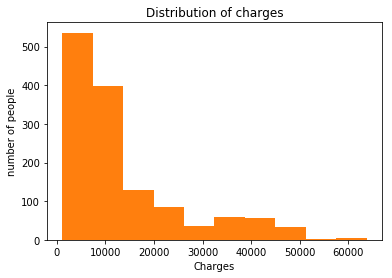

In [7]:
_ = plt.hist(medical['charges'], bins=10)
_ = plt.xlabel('Charges')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of charges')
plt.show()

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The most appropriate frequentist test would be t-test. 
Null hyposthesis: Actual average charge >=12000. Alternate hypothesis: Actual average charge<12000. Significance level = 0.05. Based on the histogram, it doesn't seem to be normally distributed. for both z and t test, data should be normally distributed. In real world, we should be careful while deciding which test to use. For z test, we need population std deviation but we can use standard error based on sample standard deviation.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ It should be a one sided t test (done manually at the end)

In [24]:
# ISSSUE: Can't use ttest_1samp because it's a 2-sided t test. 
# This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations 
# a is equal to the given population mean, popmean.
from scipy import stats
# stats.ttest_1samp(medical['charges'],12000) 

Ttest_1sampResult(statistic=3.8373517196585314, pvalue=0.000130171652092872)

ERROR! Session/line number was not unique in database. History logging moved to new session 159


In [26]:
# Not getting the right results using the following ztest so later doing manual t test and z test
from statsmodels.stats import weightstats as stests
s=np.std(medical['charges'], ddof=1) #Sample standard deviation
n=medical['charges'].count()
x = medical['charges'].mean()
stand_error = s/np.sqrt(n)
ztest ,pval = stests.ztest(medical['charges'], x2=None, alternative='smaller', value=12000) # gives critical value and p value
margin_of_error = ztest*stand_error
print(ztest)
print(pval)
print(stests.zconfint(medical['charges'], x2=None, value=12000, alpha=0.05, alternative='smaller'))
print(x-margin_of_error, x+margin_of_error)

3.8373517196585314
0.9999378158579459
(-inf, 1814.9797681379978)
12000.0 14540.844530282513


In [30]:
# SOLVED USING Z-TEST
from scipy import stats
s = np.std(medical['charges'], ddof=1) #sample standard deviation
stand_error = s/np.sqrt(n)
z_crit_value = stats.norm.ppf(.975)
margin_of_error = z_crit_value*stand_error
z_score=(medical['charges'].mean()-12000)/stand_error
p_value = stats.norm.sf(abs(z_score)) 
if p_value<0.05:
    print('P-value<alpha: reject H0') 
    print('Yes, the administrator should be concerned')
else:
    print('P-value>alpha: do not reject H0')
    print('Yes the administrator should not be concerned')
print(z_value)
print(z_score)
print(p_value)
print(medical['charges'].mean()-margin_of_error, medical['charges'].mean()+margin_of_error)

P-value<alpha: reject H0
Yes, the administrator should be concerned
1.959963984540054
3.8373517196585323
6.218414205406092e-05
12621.54197822916 13919.302552053354


In [29]:
# SOLVED USING T-TEST
from scipy import stats
s = np.std(medical['charges'], ddof=1)
n=medical['charges'].count()
stand_error = s/np.sqrt(n)
t_crit_value = stats.t.ppf(.975, n-1)
margin_of_error = t_crit_value*stand_error
t_score=(medical['charges'].mean()-12000)/stand_error
p_value = stats.t.sf(abs(t_score), n-1) 
if p_value<0.05:
    print('P-value<alpha: reject H0') 
    print('Yes, the administrator should be concerned')
else:
    print('P-value>alpha: do not reject H0')
    print('Yes the administrator should not be concerned')
print(t_crit_value)
print(t_score)
print(p_value)
print(medical['charges'].mean()-margin_of_error, medical['charges'].mean()+margin_of_error)

P-value<alpha: reject H0
Yes, the administrator should be concerned
1.961739888600845
3.8373517196585323
6.508582604643578e-05
12620.954034192644 13919.890496089869


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ Null hypothesis: There's no difference in charged amount charged to people with insurance vs. those without.
Alternative hypothesis: There's a difference in charged amount. We are assuming equal variance to start with.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ I get the same results from both

In [62]:
x1 = medical[medical['insuranceclaim']==1]['charges'].mean()
x2 = medical[medical['insuranceclaim']==0]['charges'].mean()
n1 = medical[medical['insuranceclaim']==1]['charges'].count()
n2 = medical[medical['insuranceclaim']==0]['charges'].count()
s1 = medical[medical['insuranceclaim']==1]['charges'].std()
s2 = medical[medical['insuranceclaim']==0]['charges'].std()
s_pooled = np.sqrt(((n1-1)*(s1**2)+(n2-1)*(s2**2))/(n1+n2-2))
t_man = (x1-x2)/(s_pooled*np.sqrt(1/n1 + 1/n2))
print("The manually calculated t value is: ",t_man)

The manually calculated t value is:  11.89329903087671


In [57]:
from scipy import stats
t_val, p_val = stats.ttest_ind(medical[medical['insuranceclaim']==1]['charges'], medical[medical['insuranceclaim']==0]['charges'], equal_var = True)
print("The machine calculated t value is: ",t_val)
print("The machine calculated p value is: ",p_val)

The machine calculated t value is:  11.893299030876712
The machine calculated p value is:  4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__In the same t test, if you set equal_var = False, then it doesn't assume equal variances

In [63]:
from scipy import stats
t_val, p_val = stats.ttest_ind(medical[medical['insuranceclaim']==1]['charges'], medical[medical['insuranceclaim']==0]['charges'], equal_var = False)
print("The machine calculated t value is (unequal variance): ",t_val)
print("The machine calculated p value is (unequal variance): ",p_val)

The machine calculated t value is (unequal variance):  13.298031957975649
The machine calculated p value is (unequal variance):  1.1105103216309125e-37


__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ statsmodels.stats.weightstats.CompareMeans.ztest_ind

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test